<a href="https://colab.research.google.com/github/Artemiy2708/Multi-ABM-on-financial-markets/blob/main/FX_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

class ChartistAgent:
    def __init__(self, base_currency):
        self.base_currency = base_currency
        self.other_currency = 'USD' if base_currency != 'USD' else 'EUR'
        self.balance = 1000
        self.inventory = {self.base_currency: 10, self.other_currency: 0}

    def trade(self, market1_price, market2_price):
        if market1_price < 0.9 * min(market1_price, market2_price):
            self.buy(self.base_currency, 1)
        elif market1_price > 1.1 * max(market1_price, market2_price):
            self.sell(self.base_currency, 1)

        if market2_price < 0.9 * min(market1_price, market2_price):
            self.buy(self.other_currency, 1)
        elif market2_price > 1.1 * max(market1_price, market2_price):
            self.sell(self.other_currency, 1)

    def buy(self, currency, amount):
        cost = amount
        if self.balance >= cost:
            self.balance -= cost
            self.inventory[currency] += amount

    def sell(self, currency, amount):
        if self.inventory[currency] >= amount:
            self.balance += amount
            self.inventory[currency] -= amount

class RandomTrader:
    def __init__(self, base_currency):
        self.base_currency = base_currency
        self.balance = 1000
        self.inventory = {self.base_currency: 10}

    def trade(self, market_price):
        trade_decision = random.choice(['buy', 'sell'])
        if trade_decision == 'buy':
            self.buy(1)
        elif trade_decision == 'sell':
            self.sell(1)

    def buy(self, amount):
        cost = amount
        if self.balance >= cost:
            self.balance -= cost
            self.inventory[self.base_currency] += amount

    def sell(self, amount):
        if self.inventory[self.base_currency] >= amount:
            self.balance += amount
            self.inventory[self.base_currency] -= amount

# Simulation
market1_price = 1.0
market2_price = 1.5

chartist_agent = ChartistAgent('EUR')
random_trader = RandomTrader('USD')

for _ in range(100):
    chartist_agent.trade(market1_price, market2_price)
    random_trader.trade(market1_price)

print("Chartist Agent Inventory:", chartist_agent.inventory)
print("Random Trader Inventory:", random_trader.inventory)

Chartist Agent Inventory: {'EUR': 10, 'USD': 0}
Random Trader Inventory: {'USD': 3}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ChartistAgent:
    def __init__(self, name, base_currency, target_currency, course_rate):
        self.name = name
        self.base_currency = base_currency
        self.target_currency = target_currency
        self.course_rate = course_rate
        self.balance_base = 1000
        self.balance_target = 0
        self.history = []

    def buy_low_sell_high(self, market_price):
        if market_price < self.course_rate:
            amount_to_buy = self.balance_base // market_price
            self.balance_base -= amount_to_buy * market_price
            self.balance_target += amount_to_buy
        elif market_price > self.course_rate:
            amount_to_sell = self.balance_target
            self.balance_base += amount_to_sell * market_price
            self.balance_target = 0
        self.history.append(self.balance_base + self.balance_target)

    def plot_history(self):
        plt.plot(self.history)
        plt.title(f"{self.name} Balance Over Time")
        plt.xlabel("Time")
        plt.ylabel("Balance")
        plt.show()


In [ ]:
class RandomTraderAgent:
    def __init__(self, name, base_currency, target_currency):
        self.name = name
        self.base_currency = base_currency
        self.target_currency = target_currency
        self.balance_base = 1000
        self.balance_target = 0
        self.history = []

    def trade_randomly(self, market_price):
        if np.random.choice([True, False]):
            amount_to_buy = self.balance_base // market_price
            self.balance_base -= amount_to_buy * market_price
            self.balance_target += amount_to_buy
        else:
            amount_to_sell = np.random.randint(1, self.balance_target+1)
            self.balance_base += amount_to_sell * market_price
            self.balance_target -= amount_to_sell
        self.history.append(self.balance_base + self.balance_target)

    def plot_history(self):
        plt.plot(self.history)
        plt.title(f"{self.name} Balance Over Time")
        plt.xlabel("Time")
        plt.ylabel("Balance")
        plt.show()

In [ ]:
class Exchange:
    def __init__(self, name, currency, initial_price):
        self.name = name
        self.currency = currency
        self.current_price = initial_price
        self.history = [initial_price]

    def update_price(self):
        self.current_price = max(0.5 * self.current_price, 1.5 * self.current_price)
        self.history.append(self.current_price)

    def stop_trading(self):
        self.history += [self.current_price] * 10

    def plot_price_trend(self):
        plt.plot(self.history)
        plt.title(f"{self.name} Price Trend")
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.show()

In [ ]:
exchange1 = Exchange("Exchange1", "USD", 1.0)
exchange2 = Exchange("Exchange2", "EUR", 0.8)

# Create Chartist agent and Random trader agent for both exchanges
chartist1 = ChartistAgent("Chartist1", "USD", "EUR", 0.9)
chartist2 = ChartistAgent("Chartist2", "EUR", "USD", 1.1)
random_trader1 = RandomTraderAgent("RandomTrader1", "USD", "EUR")
random_trader2 = RandomTraderAgent("RandomTrader2", "EUR", "USD")

# Simulation
for i in range(50):
    exchange1.update_price()
    exchange2.update_price()
    chartist1.buy_low_sell_high(exchange1.current_price)
    chartist1.buy_low_sell_high(exchange2.current_price)
    chartist2.buy_low_sell_high(exchange1.current_price)
    chartist2.buy_low_sell_high(exchange2.current_price)
    random_trader1.trade_randomly(exchange1.current_price)


ValueError: low >= high

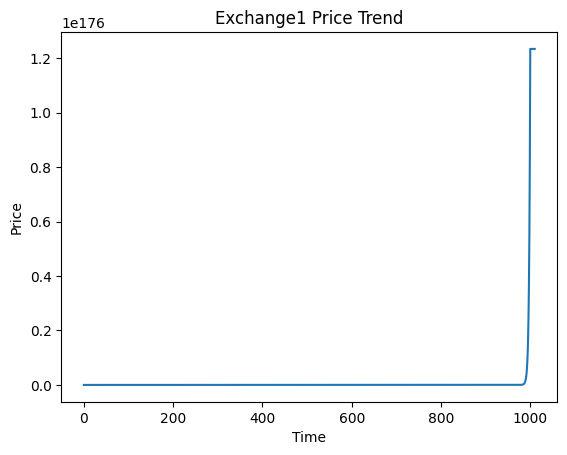

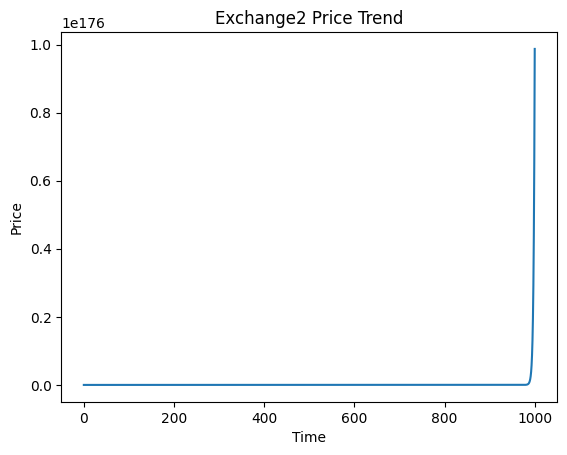

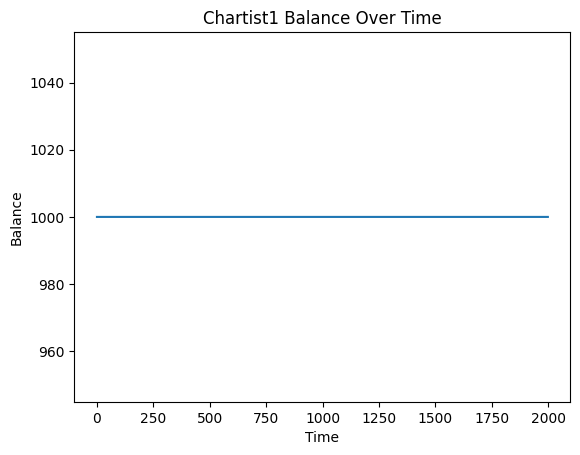

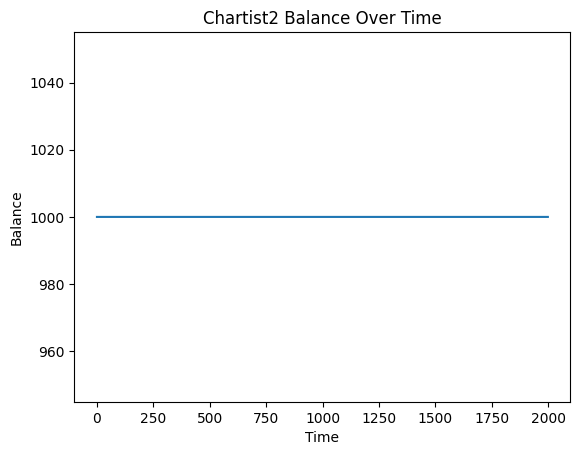

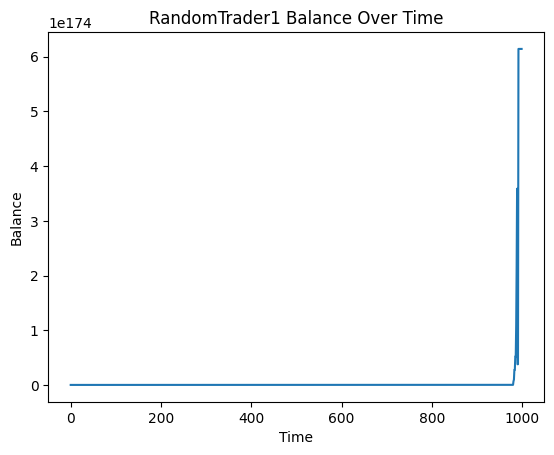

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ChartistAgent:
    def __init__(self, name, base_currency, target_currency, course_rate):
        self.name = name
        self.base_currency = base_currency
        self.target_currency = target_currency
        self.course_rate = course_rate
        self.balance_base = 1000
        self.balance_target = 0
        self.history = []

    def buy_low_sell_high(self, market_price):
        if market_price < self.course_rate:
            amount_to_buy = self.balance_base // market_price
            self.balance_base -= amount_to_buy * market_price
            self.balance_target += amount_to_buy
        elif market_price > self.course_rate:
            amount_to_sell = self.balance_target
            self.balance_base += amount_to_sell * market_price
            self.balance_target = 0
        self.history.append(self.balance_base + self.balance_target)

    def plot_history(self):
        plt.plot(self.history)
        plt.title(f"{self.name} Balance Over Time")
        plt.xlabel("Time")
        plt.ylabel("Balance")
        plt.show()

class RandomTraderAgent:
    def __init__(self, name, base_currency, target_currency):
        self.name = name
        self.base_currency = base_currency
        self.target_currency = target_currency
        self.balance_base = 1000
        self.balance_target = 0
        self.history = []

    def trade_randomly(self, market_price):
        if np.random.choice([True, False]):
            amount_to_buy = self.balance_base // market_price
            self.balance_base -= amount_to_buy * market_price
            self.balance_target += amount_to_buy
        else:
            amount_to_sell = np.random.uniform(0,1)
            self.balance_base += amount_to_sell * market_price
            self.balance_target -= amount_to_sell
        self.history.append(self.balance_base + self.balance_target)

    def plot_history(self):
        plt.plot(self.history)
        plt.title(f"{self.name} Balance Over Time")
        plt.xlabel("Time")
        plt.ylabel("Balance")
        plt.show()

class Exchange:
    def __init__(self, name, currency, initial_price):
        self.name = name
        self.currency = currency
        self.current_price = initial_price
        self.history = [initial_price]

    def update_price(self):
        self.current_price = max(0.5 * self.current_price, 1.5 * self.current_price)
        self.history.append(self.current_price)

    def stop_trading(self):
        self.history += [self.current_price] * 10

    def plot_price_trend(self):
        plt.plot(self.history)
        plt.title(f"{self.name} Price Trend")
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.show()

# Create 2 exchanges with different currencies
exchange1 = Exchange("Exchange1", "USD", 1.0)
exchange2 = Exchange("Exchange2", "EUR", 0.8)

# Create Chartist agent and Random trader agent for both exchanges
chartist1 = ChartistAgent("Chartist1", "USD", "EUR", 0.9)
chartist2 = ChartistAgent("Chartist2", "EUR", "USD", 1.1)
random_trader1 = RandomTraderAgent("RandomTrader1", "USD", "EUR")
random_trader2 = RandomTraderAgent("RandomTrader2", "EUR", "USD")

# Simulation
for i in range(1000):
    exchange1.update_price()
    exchange2.update_price()
    chartist1.buy_low_sell_high(exchange1.current_price)
    chartist1.buy_low_sell_high(exchange2.current_price)
    chartist2.buy_low_sell_high(exchange1.current_price)
    chartist2.buy_low_sell_high(exchange2.current_price)
    random_trader1.trade_randomly(exchange1.current_price)
# Stop trading on Exchange1
exchange1.stop_trading()

# Plot price trends and agent balances
exchange1.plot_price_trend()
exchange2.plot_price_trend()
chartist1.plot_history()
chartist2.plot_history()
random_trader1.plot_history()


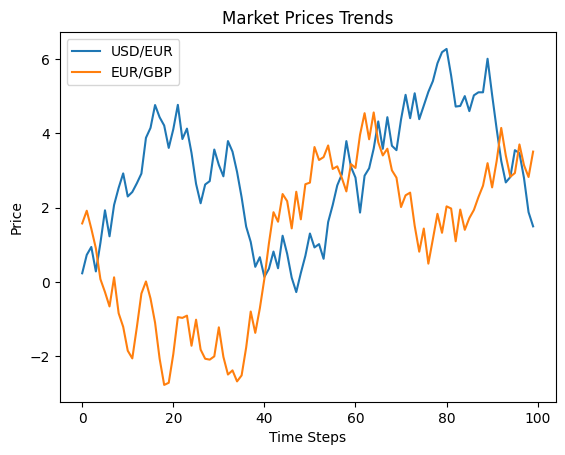

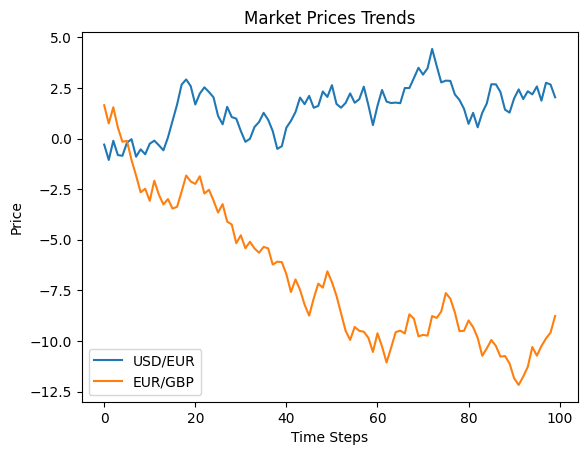

In [ ]:
import random
import matplotlib.pyplot as plt

class Exchange:
    def __init__(self, base_currency, quote_currency, init_price):
        self.base_currency = base_currency
        self.quote_currency = quote_currency
        self.price = init_price

    def update_price(self):
        self.price += random.uniform(-1, 1)

class ChartistAgent:
    def __init__(self, base_currency, quote_currency, exchange, course_rate):
        self.base_currency = base_currency
        self.quote_currency = quote_currency
        self.exchange = exchange
        self.course_rate = course_rate

    def buy(self):
        if self.base_currency == self.exchange.base_currency:
            if self.exchange.price < self.course_rate:
                self.exchange.price = self.course_rate
        else:
            if self.exchange.price > self.course_rate:
                self.exchange.price = self.course_rate

    def sell(self):
        if self.base_currency == self.exchange.base_currency:
            if self.exchange.price > self.course_rate:
                self.exchange.price = self.course_rate
        else:
            if self.exchange.price < self.course_rate:
                self.exchange.price = self.course_rate

class RandomTrader:
    def __init__(self, exchange):
        self.exchange = exchange

    def trade(self):
        self.exchange.update_price()

def visualize_prices(exchange1, exchange2, steps):
    prices1 = []
    prices2 = []

    for _ in range(steps):
        exchange1.update_price()
        exchange2.update_price()
        prices1.append(exchange1.price)
        prices2.append(exchange2.price)

    plt.plot(range(steps), prices1, label=f'{exchange1.base_currency}/{exchange1.quote_currency}')
    plt.plot(range(steps), prices2, label=f'{exchange2.base_currency}/{exchange2.quote_currency}')
    plt.legend()
    plt.title('Market Prices Trends')
    plt.xlabel('Time Steps')
    plt.ylabel('Price')
    plt.show()

def stop_trading(exchange):
    exchange.price = 0

# Main simulation
exchange1 = Exchange('USD', 'EUR', 1.2)
exchange2 = Exchange('EUR', 'GBP', 0.8)

chartist_agent = ChartistAgent('USD', 'EUR', exchange1, 1.2)
random_trader = RandomTrader(exchange2)
steps = 100

visualize_prices(exchange1, exchange2, steps)

for _ in range(steps):
    chartist_agent.buy()
    chartist_agent.sell()
    random_trader.trade()

stop_trading(exchange1)
visualize_prices(exchange1, exchange2, steps)

Chartist Agent sold EUR for <__main__.Currency object at 0x7f079567f940> at 1.1529475700871323 <__main__.Currency object at 0x7f079567f940>
Random Trader traded EUR on Exchange 2 at 1.2269778127545201 USD


ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

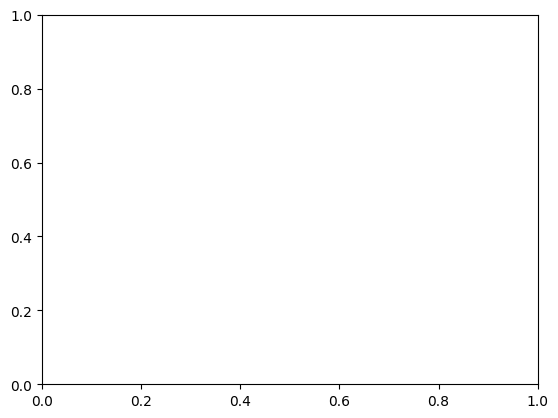

In [ ]:
import random
import matplotlib.pyplot as plt

class ChartistAgent:
    def __init__(self, currency, base_currency, course_rate):
        self.currency = currency
        self.base_currency = base_currency
        self.course_rate = course_rate

    def buy_low_sell_high(self, exchange):
        if self.currency.price < exchange[self.base_currency].price:
            print(f"Chartist Agent bought {self.currency.name} for {self.base_currency} at {self.currency.price} {self.base_currency}")
        else:
            print(f"Chartist Agent sold {self.currency.name} for {self.base_currency} at {self.currency.price} {self.base_currency}")

class RandomTrader:
    def __init__(self, currency):
        self.currency = currency

    def trade(self, exchange):
        price = random.uniform(0.9*exchange[self.currency].price, 1.1*exchange[self.currency].price)
        return price

class Currency:
    def __init__(self, name, price):
        self.name = name
        self.price = price

def visualize_trend(currency_prices, iteration):
    for currency, prices in currency_prices.items():
        plt.plot(range(iteration), prices, label=currency)
    plt.xlabel('Iteration')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Initialize currencies
USD = Currency("USD", 1.0)
EUR = Currency("EUR", 1.2)

# Initialize exchanges
exchange1 = {USD: USD, EUR: EUR}
exchange2 = {USD: USD, EUR: Currency("EUR", 1.15)}

# Initialize agents
chartist_agent = ChartistAgent(EUR, USD, 1.1)
random_trader = RandomTrader(EUR)

# Simulation
currency_prices = {USD.name: [], EUR.name: []}
iteration = 0
while True:
    # Update currency prices
    for currency in [USD, EUR]:
        currency.price = random.uniform(0.9*currency.price, 1.1*currency.price)
        currency_prices[currency.name].append(currency.price)

    # Trade on exchanges
    chartist_agent.buy_low_sell_high(exchange1)
    random_price = random_trader.trade(exchange2)
    print(f"Random Trader traded EUR on Exchange 2 at {random_price} USD")

    # Visualize trends every 10 iterations
    if iteration % 10 == 0:
        visualize_trend(currency_prices, iteration)

    iteration += 1

    # Stop trading on Exchange 1 after 50 iterations
    if iteration == 50:
        print("Trading on Exchange 1 stopped.")
        exchange1 = None

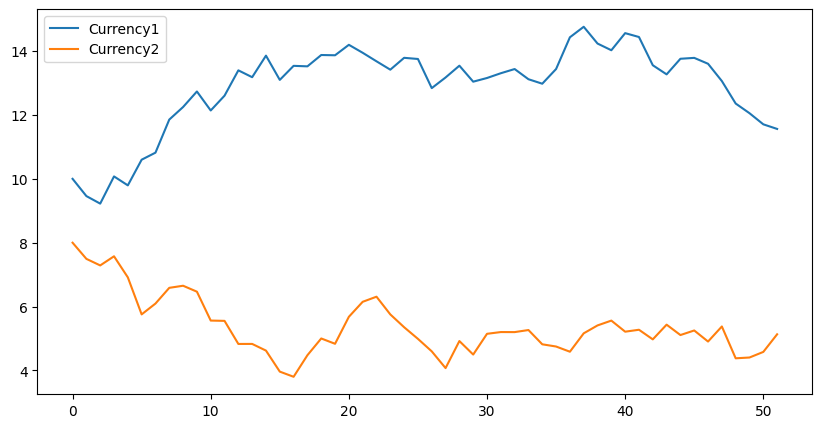

In [ ]:
class Exchange:
    def __init__(self, currency_name, initial_price):
        self.currency_name = currency_name
        self.price_trend = [initial_price]

    def update_price(self):
        new_price = self.price_trend[-1] + np.random.normal(0, 0.5)  # Simulate random price change
        if new_price > 0:  # Ensure price is positive
            self.price_trend.append(new_price)
class ChartistAgent:
    def __init__(self, balance, course_rate):
        self.balance = balance
        self.course_rate = course_rate

    def trade(self, exchange):
        if self.balance >= self.course_rate:
            self.balance -= self.course_rate
            self.balance += self.course_rate * exchange.price_trend[-1]

class RandomAgent:
    def __init__(self, balance):
        self.balance = balance

    def trade(self, exchange):
        # Random agent trades randomly, not following any specific strategy
        pass

def plot_price_trend(exchange):
    plt.plot(exchange.price_trend, label=exchange.currency_name)

def simulate_trading(n_iterations):
    exchange1 = Exchange("Currency1", 10)
    exchange2 = Exchange("Currency2", 8)

    chartist = ChartistAgent(100, 2)
    random_agent = RandomAgent(100)

    for i in range(n_iterations):
        exchange1.update_price()
        exchange2.update_price()

        chartist.trade(exchange1)
        chartist.trade(exchange2)

        random_agent.trade(exchange1)

        if i == n_iterations // 2:  # Stop trading on one exchange
            break

    plt.figure(figsize=(10, 5))
    plot_price_trend(exchange1)
    plot_price_trend(exchange2)
    plt.legend()
    plt.show()

simulate_trading(100)


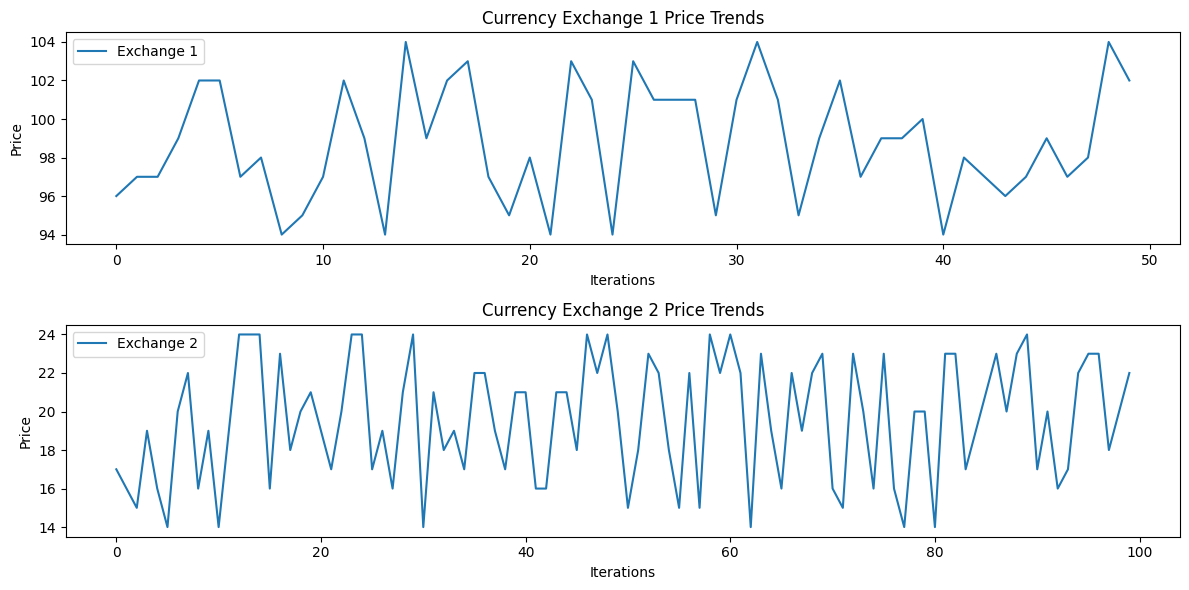

In [ ]:
import random
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, type):
        self.type = type

class CurrencyExchange:
    def __init__(self, currency_value):
        self.currency_value = currency_value

def generate_random_market_price():
    return random.randint(1, 100)

def simulate_market_trends(iterations, first_exchange_stop_iteration):
    exchange1_prices = []
    exchange2_prices = []

    exchange1 = CurrencyExchange(currency_value=generate_random_market_price())
    exchange2 = CurrencyExchange(currency_value=generate_random_market_price())

    for i in range(iterations):
        if i == first_exchange_stop_iteration:
            exchange1 = None

        if exchange1:
            new_price1 = exchange1.currency_value + random.randint(-5, 5)
            exchange1_prices.append(new_price1)
        else:
            exchange1_prices.append(None)

        new_price2 = exchange2.currency_value + random.randint(-5, 5)
        exchange2_prices.append(new_price2)

    return exchange1_prices, exchange2_prices

def visualize_market_prices(exchange1_prices, exchange2_prices):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(exchange1_prices, label='Exchange 1')
    plt.title('Currency Exchange 1 Price Trends')
    plt.xlabel('Iterations')
    plt.ylabel('Price')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(exchange2_prices, label='Exchange 2')
    plt.title('Currency Exchange 2 Price Trends')
    plt.xlabel('Iterations')
    plt.ylabel('Price')
    plt.legend()

    plt.tight_layout()
    plt.show()

iterations = 100
first_exchange_stop_iteration = 50

exchange1_prices, exchange2_prices = simulate_market_trends(iterations, first_exchange_stop_iteration)
visualize_market_prices(exchange1_prices, exchange2_prices)

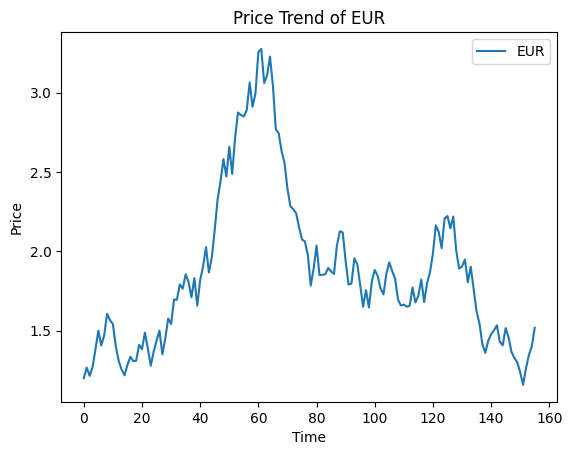

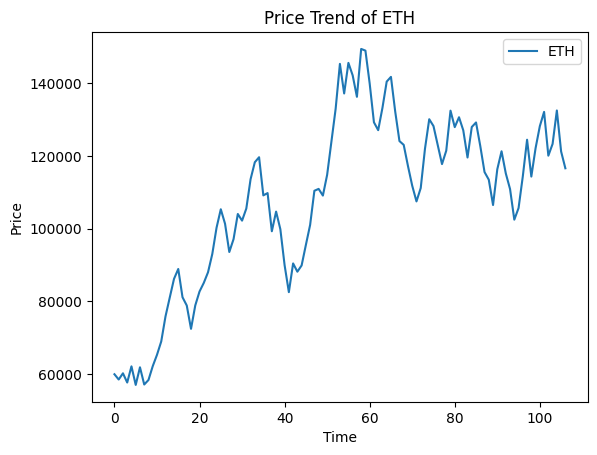

In [ ]:
import random
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, agent_type, balance):
        self.agent_type = agent_type
        self.balance = balance

    def trade(self, exchange):
        if self.agent_type == 'chartist':
            currency_to_buy = random.choice([currency for currency in exchange.currencies if currency != exchange.base_currency])
            amount_to_buy = self.balance / exchange.get_currency_price(currency_to_buy)
            self.balance -= amount_to_buy * exchange.get_currency_price(currency_to_buy)
            exchange.buy_currency(currency_to_buy, amount_to_buy)
        elif self.agent_type == 'random_trader':
            currency_to_trade = random.choice(exchange.currencies)
            trade_amount = random.uniform(0, self.balance)
            self.balance -= trade_amount
            exchange.trade_currency(currency_to_trade, trade_amount)

class Exchange:
    def __init__(self, base_currency, currency_1, currency_2, start_price_1, start_price_2):
        self.base_currency = base_currency
        self.currencies = [currency_1, currency_2]
        self.prices = {currency_1: [start_price_1], currency_2: [start_price_2]}
        self.active = True

    def get_currency_price(self, currency):
        return self.prices[currency][-1]

    def buy_currency(self, currency, amount):
        new_price = self.get_currency_price(currency) * random.uniform(0.9, 1.1)  # Random price fluctuation
        self.prices[currency].append(new_price)

    def trade_currency(self, currency, amount):
        new_price = self.get_currency_price(currency) * random.uniform(0.9, 1.1)  # Random price fluctuation
        self.prices[currency].append(new_price)

    def stop_trading(self):
        self.active = False

def visualize_prices(exchange, currency):
    plt.plot(range(len(exchange.prices[currency])), exchange.prices[currency], label=currency)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Price Trend of ' + currency)
    plt.legend()
    plt.show()

# Initialize Agents and Exchanges
chartist_1 = Agent('chartist', 1000)
chartist_2 = Agent('chartist', 1000)
random_trader = Agent('random_trader', 1000)

exchange_1 = Exchange('USD', 'EUR', 'GBP', 1.2, 1.5)
exchange_2 = Exchange('BTC', 'ETH', 'LTC', 60000, 2000)

# Simulate Trading
for _ in range(100):
    if exchange_1.active:
        chartist_1.trade(exchange_1)
        chartist_2.trade(exchange_1)
        random_trader.trade(exchange_1)

    if exchange_2.active:
        chartist_1.trade(exchange_2)
        chartist_2.trade(exchange_2)

# Visualize Price Trends
visualize_prices(exchange_1, 'EUR')
visualize_prices(exchange_2, 'ETH')



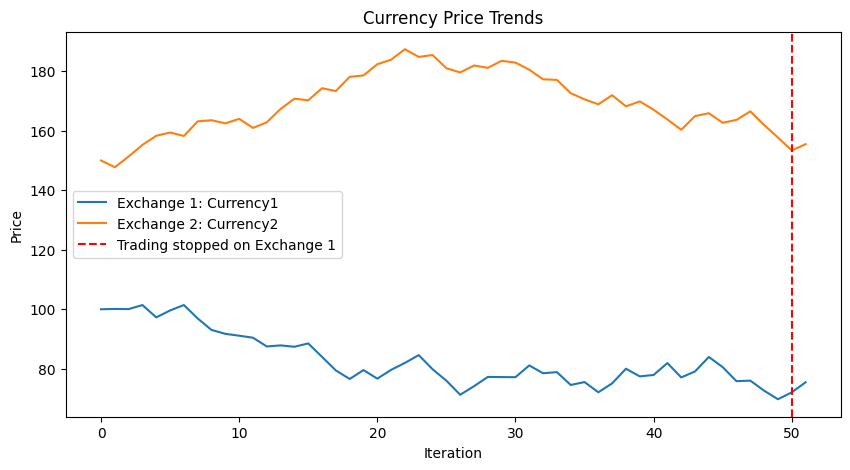

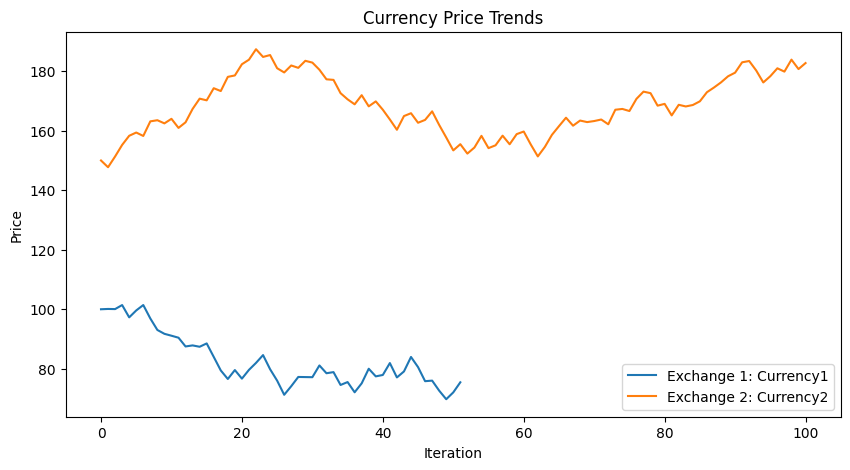

In [ ]:
import random
import matplotlib.pyplot as plt

# Constants
INITIAL_PRICE_CURRENCY1 = 100
INITIAL_PRICE_CURRENCY2 = 150
STOP_TRADING_ITERATION = 50
FIXED_EXCHANGE_RATE = 1.5

class ChartistAgent:
    def buy_currency(self, currency, amount):
        pass

    def sell_currency(self, currency, amount):
        pass

class RandomAgent:
    def trade(self, currency, exchange):
        pass

class Exchange:
    def __init__(self, currency, initial_price):
        self.currency = currency
        self.price_trend = [initial_price]
        self.active = True

    def update_price(self):
        if self.active:
            new_price = self.price_trend[-1] + random.uniform(-5, 5)
            self.price_trend.append(max(new_price, 0))

    def stop_trading(self):
        self.active = False

def visualize_price_trend(exchange1, exchange2, iteration=None):
    plt.figure(figsize=(10, 5))
    plt.plot(exchange1.price_trend, label=f'Exchange 1: {exchange1.currency}')
    plt.plot(exchange2.price_trend, label=f'Exchange 2: {exchange2.currency}')
    if iteration:
        plt.axvline(x=iteration, linestyle='--', color='red', label='Trading stopped on Exchange 1')
    plt.xlabel('Iteration')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Currency Price Trends')
    plt.show()

def simulate_trading(iterations):
    exchange1 = Exchange('Currency1', INITIAL_PRICE_CURRENCY1)
    exchange2 = Exchange('Currency2', INITIAL_PRICE_CURRENCY2)
    chartist_agent1 = ChartistAgent()
    chartist_agent2 = ChartistAgent()
    random_agent = RandomAgent()

    for i in range(iterations):
        exchange1.update_price()
        exchange2.update_price()

        if i == STOP_TRADING_ITERATION:
            exchange1.stop_trading()
            visualize_price_trend(exchange1, exchange2, i)

        if exchange1.active:
            # Chartist agents trade on both exchanges
            chartist_agent1.buy_currency('Currency1', 10)
            chartist_agent1.sell_currency('Currency2', 10 * FIXED_EXCHANGE_RATE)
            chartist_agent2.buy_currency('Currency1', 10)
            chartist_agent2.sell_currency('Currency2', 10 * FIXED_EXCHANGE_RATE)

        # Random agent trades on Exchange2 only
        random_agent.trade('Currency2', exchange2)

    visualize_price_trend(exchange1, exchange2)

# Simulate trading for 100 iterations
simulate_trading(100)
